In [1]:
%matplotlib inline

In [3]:
%run -i ~/src/srvc-id/analyze-all.py -f 0.lst -f 1.lst -f 10.lst -f 11.lst -f 12.lst -f 13.lst -f 14.lst -f 2.lst -f 3.lst -f 4.lst -f 5.lst -f 6.lst -f 7.lst -f 8.lst -f 9.lst

In [4]:
#1 google.com 11
#2 youtube.com 2
#3 amazon.com 8

#4 facebook.com 0
#5 instagram.com 13
#6 instagram.com/arianagrande 6

#7 yahoo.com 1
#8 twitter.com 7
#9 twitter.com/katyperry 10

#10 reddit.com 12
#11 wikipedia.org 9
#12 cnn.com 5

#13 baidu.com 4
#14 yandex.ru 14
#15 uh.edu 3
translate={
    '0':'4',   # facebook.com
    '1':'7',   # yahoo.com
    '2':'2',   # youtube.com
    '3':'15',  # uh.edu
    '4':'13',   # baidu.com
    '5':'12',  # cnn.com
    '6':'6',  # arianagrande
    '7':'8',   # twitter
    '8':'3',   # amazon.com
    '9':'11',   # wikipedia.org
    '10':'9',  # katyperry
    '11':'1',  # google.com
    '12':'10', # reddit.com
    '13':'5', # instagram
    '14':'14' # yandex.ru
}

In [122]:
os.chdir(OWD)
convsLen={}
convAppLocation = {}
ipAppFreq={}
appConvLenTime = {}
concConvs = {}
proConvs = {}

for flist in OPTS.flist:
    tag = flist[:-4]
    FILES[tag] = [f for f in readList(flist)]
    os.chdir(tag)

    print(f"Working on {tag}")
    convsLen.setdefault(tag, [])
    convAppLocation.setdefault(tag, {})
    appConvLenTime.setdefault(tag, {})
    concConvs.setdefault(tag, {})
    proConvs.setdefault(tag, [])

    #DATA[tag] = process.process(FILES[tag], groupBy=process.site_groupBy, preprocess=process.concurrent_preprocess, updateFuncs=UPDATES)
    D = process.process(FILES[tag], groupBy=process.site_groupBy, preprocess=process.concurrent_preprocess, updateFuncs=UPDATES)

    #Revert back to Original Working Directory
    os.chdir(OWD)

    pcap_data, stats = D
    for ip in stats['ip_freq']:
        ipAppFreq.setdefault(ip, set())
        ipAppFreq[ip].add(tag)       

    for fname in pcap_data:
        site = pcap_data[fname]['site']
        
        convsLen[tag].append(len(pcap_data[fname]['convs']))
        convAppLocation[tag].setdefault(site, [])
        convAppLocation[tag][pcap_data[fname]['site']].append( len(pcap_data[fname]['convs']) )        
        
        start = pcap_data[fname]['convs'][0]['values'][0][0]        
        appConvLenTime[tag].setdefault(site, [])
        
        values = []
        for conv in pcap_data[fname]['convs']:
            values.append((conv['values'][0][0]-start, conv['len']))
        appConvLenTime[tag][site].append(values)
        
        concConvs[tag].setdefault(site, [])
        for ind, conv in enumerate(pcap_data[fname]['processed']):
            concConvs[tag][site].append((ind,conv[1]))
        
        proConvs[tag].append(len(pcap_data[fname]['processed']))

Working on 0
Working on 1
Working on 10
Working on 11
Working on 12
Working on 13
Working on 14
Working on 2
Working on 3
Working on 4
Working on 5
Working on 6
Working on 7
Working on 8
Working on 9


## Histogram of All Conversations

In [ ]:
fig = plt.figure(figsize=(13,13), constrained_layout=True)
axes = fig.subplots(5,3)
for i in convsLen:
    coord = int(translate[i])-1
    x = int(coord/3)
    y = int(coord%3)
    ax = axes[x][y]
    
    n=ax.hist(convsLen[i],bins=7, label=translate[i])
    ax.set_title('Application %s' %(translate[i]))
    ax.set_xticks([int(x) for x in n[1]])
    ax.set_ylim([0,len(convsLen[i])])
    ax.set_xlabel('Conversation Count')
    ax.set_ylabel('Instance Count')
    
fig.suptitle('Histogram of Network Conversation per Application',size=16, y=1.02)
#plt.subplots_adjust(bottom=-0.2, top=0.9)
#plt.tight_layout()
fig.savefig('/home/ldane/Desktop/histConvs.png', bbox_inches="tight")

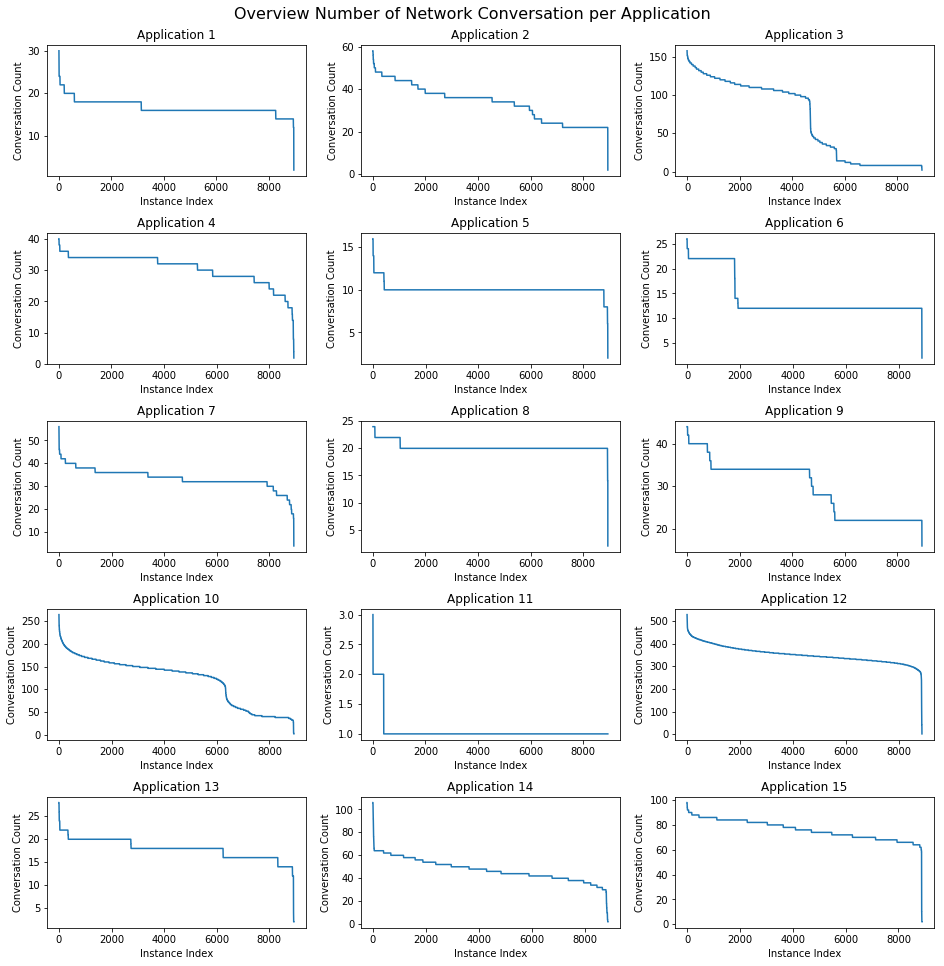

In [139]:
fig = plt.figure(figsize=(13,13), constrained_layout=True)
axes = fig.subplots(5,3)
for i in convsLen:
    coord = int(translate[i])-1
    x = int(coord/3)
    y = int(coord%3)
    ax = axes[x][y]
    
    ax.plot(sorted(convsLen[i],reverse=True), label=translate[i])
    ax.set_title('Application %s' %(translate[i]))
    ax.set_xlabel('Instance Index')
    ax.set_ylabel('Conversation Count')
                  
fig.suptitle('Overview Number of Network Conversation per Application',size=16, y=1.02)
#plt.subplots_adjust(bottom=-0.2, top=0.9)
#plt.tight_layout()
fig.savefig('/home/ldane/Desktop/histConvs-2.png', bbox_inches="tight")

## Unique/Shared IP per Application

In [ ]:
totalIPs = {}
for ip, tags in ipAppFreq.items():
    for tag in tags:
        tTag = translate[tag]
        t = totalIPs.get(tTag, 0)
        totalIPs[tTag] = t+1

In [ ]:
uniqueIPs = {}
for tag in range(15):
    tag = str(tag)
    tTag = translate[tag]
    uniqueIPs[tTag] = len(tagIPFreq[tag])

In [ ]:
plot_data = []
for tag in range(1,16):
    k = str(tag)
    plot_data.append((k,totalIPs[k],uniqueIPs[k]))

In [ ]:
fig = plt.figure(figsize=(13,5), constrained_layout=True)
ax = plt.gca()
ax.bar([i[0] for i in plot_data], [i[1] for i in plot_data], align='center', label='Shared')
ax.bar([i[0] for i in plot_data], [i[2] for i in plot_data], align='center', label='Unique')
ax.set_title('Shared/Unique IP Distribution per Application')
ax.set_xlabel('Applications')
ax.set_ylabel('IP Count')
ax.legend(fancybox=True, shadow=True, ncol=5)
fig.savefig('/home/ldane/Desktop/dist-IP.png', bbox_inches="tight")

In [ ]:
plot_data = []
for tag in range(1,16):
    k = str(tag)
    plot_data.append((k,1,uniqueIPs[k]/totalIPs[k]))

In [ ]:
fig = plt.figure(figsize=(13,5), constrained_layout=True)
ax = plt.gca()
ax.bar([i[0] for i in plot_data], [i[1] for i in plot_data], align='center', label='Shared')
ax.bar([i[0] for i in plot_data], [i[2] for i in plot_data], align='center', label='Unique')
ax.set_title('Normalized Shared/Unique IP Distribution per Application')
ax.set_xlabel('Applications')
ax.set_ylabel('Percentage of Unique IP vs Shared IP')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)
fig.savefig('/home/ldane/Desktop/dist-IP-norm.png', bbox_inches="tight")

## Conversation Count Per Location

In [ ]:
fig = plt.figure(figsize=(13,13), constrained_layout=True)
axes = fig.subplots(5,3)
for i in convAppLocation:
    coord = int(translate[i])-1
    x = int(coord/3)
    y = int(coord%3)
    ax = axes[x][y]
    #print(coord, x, y)
    for site in convAppLocation[i]:
        data = convAppLocation[i][site]
        ax.hist(data, label=site, histtype=u'step')
    
    ax.set_xlabel('Conversation Count')
    ax.set_ylabel('Instance Count')
    #ax.set_xticks([int(x) for x in n[1]])
    ax.set_ylim([0,max([len(v) for k,v in convAppLocation[i].items()])])
    
    ax.set_title('Application %s' %(translate[i]))

handles, labels = ax.get_legend_handles_labels()

site_lookup = {
  'pc3.instageni.utc.edu':'Chattanooga, TN',
  'pc5.instageni.cenic.net':'Los Angeles, CA',
  'pc5.instageni.wisc.edu':'Madison, WI',
  'pc5.instageni.hawaii.edu':'Honolulu, HI',
  'pc5.genirack.nyu.edu':'New York, NY'
  }

labels = [site_lookup[c] for c in labels]

fig.legend(handles, labels, loc='lower center', bbox_to_anchor = (0,-0.04,1,1),
            bbox_transform = plt.gcf().transFigure, fancybox=True, shadow=True, ncol=5)
fig.suptitle('Histogram of Number of Network Conversation per Application grouped by Locations',size=16, y=1.02)
#plt.subplots_adjust(bottom=-0.2, top=0.9)
#plt.tight_layout()
fig.savefig('/home/ldane/Desktop/conv-site-hist-1.png', bbox_inches="tight")

## Conversation per Location

In [ ]:
fig = plt.figure(figsize=(13,13), constrained_layout=True)
axes = fig.subplots(5,3)
for i in convAppLocation:
    coord = int(translate[i])-1
    x = int(coord/3)
    y = int(coord%3)
    ax = axes[x][y]
    
    for site in convAppLocation[i]:
        data = convAppLocation[i][site]                
        data.sort(reverse=True)
        ax.plot(data, label=site)
        
    ax.set_xlabel('Instances')
    ax.set_ylabel('Conversation Count')    
    ax.set_title('Application %s' %(translate[i]))
    
handles, labels = ax.get_legend_handles_labels()

site_lookup = {
  'pc3.instageni.utc.edu':'Chattanooga, TN',
  'pc5.instageni.cenic.net':'Los Angeles, CA',
  'pc5.instageni.wisc.edu':'Madison, WI',
  'pc5.instageni.hawaii.edu':'Honolulu, HI',
  'pc5.genirack.nyu.edu':'New York, NY'
  }

labels = [site_lookup[c] for c in labels]

fig.legend(handles, labels, loc='lower center', bbox_to_anchor = (0,-0.04,1,1),
            bbox_transform = plt.gcf().transFigure, fancybox=True, shadow=True, ncol=5)
fig.suptitle('Overview of Number of Network Conversation per Application grouped by Locations',size=16, y=1.02)
#plt.subplots_adjust(bottom=-0.2, top=0.9)
#plt.tight_layout()
fig.savefig('/home/ldane/Desktop/conv-site-hist-2.png', bbox_inches="tight")


## Shared/Unique IP in Applications per location

## Conversation Lengths

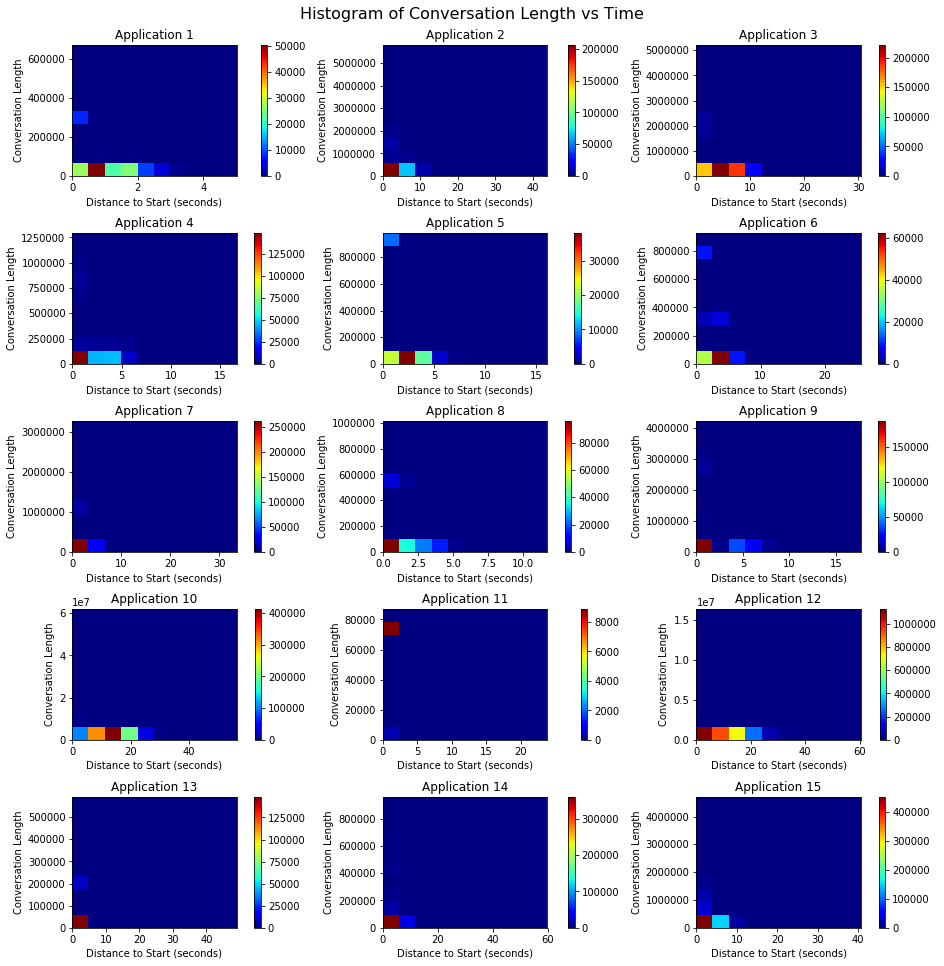

In [98]:
fig = plt.figure(figsize=(13,13), constrained_layout=True)
axes = fig.subplots(5,3)
for i in appConvLenTime:
    coord = int(translate[i])-1
    x = int(coord/3)
    y = int(coord%3)
    ax = axes[x][y]
    #print(coord, x, y)
    plot_x = []
    plot_y = []
    for site in appConvLenTime[i]:
        for convs in appConvLenTime[i][site]:
            for conv in convs:
                plot_x.append(conv[0])
                plot_y.append(conv[1])
    h = ax.hist2d(plot_x, plot_y, cmap=plt.cm.jet)
    
    ax.set_xlabel('Distance to Start (seconds)')
    ax.set_ylabel('Conversation Length')
    #if i == '9':
        #ax.set_xlim(0, 0.5)
    #    ax.set_xticks([0])
        #ax.set_ylim(1, 2)
    #    ax.set_yticks([1,2])
    
    ax.set_title('Application %s' %(translate[i]))
    fig.colorbar(h[3], ax=ax)
    

fig.suptitle('Histogram of Conversation Length vs Time',size=16, y=1.02)
#plt.subplots_adjust(bottom=-0.2, top=0.9)
#plt.tight_layout()
fig.savefig('/home/ldane/Desktop/convlen-app-scatter.png', bbox_inches="tight")

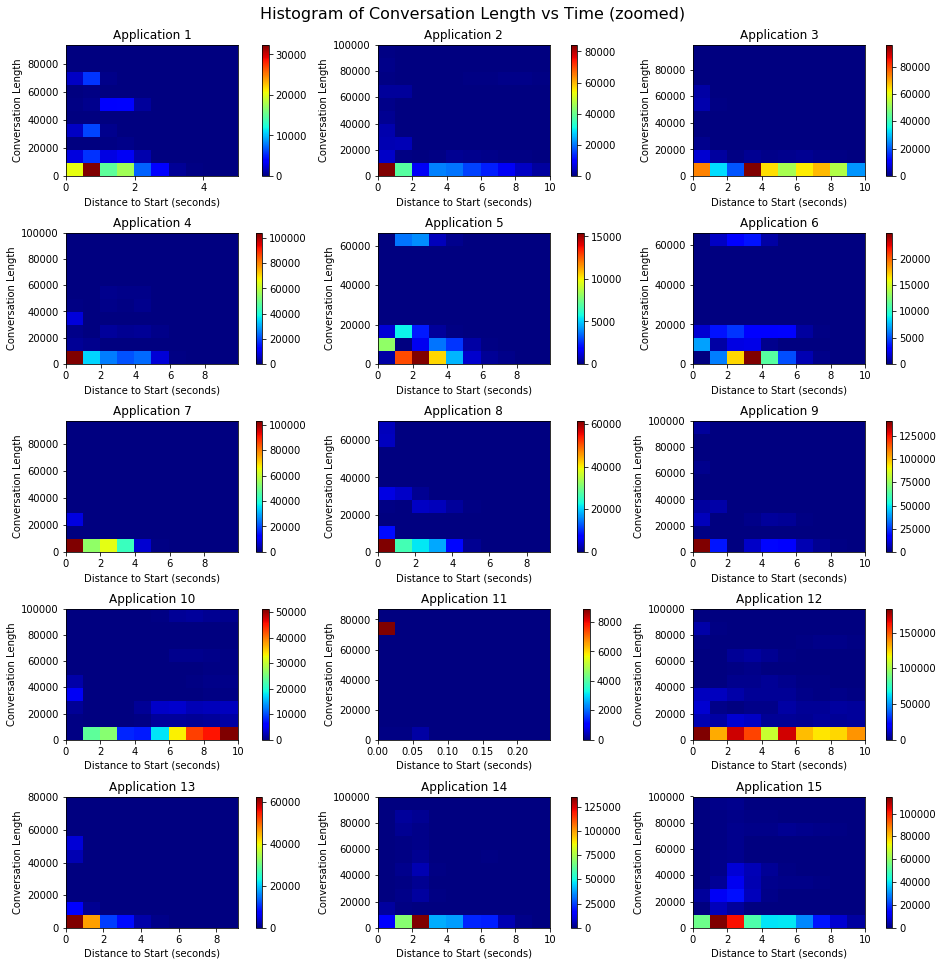

In [108]:
fig = plt.figure(figsize=(13,13), constrained_layout=True)
axes = fig.subplots(5,3)


t=10
k=5

for i in appConvLenTime:
    coord = int(translate[i])-1
    x = int(coord/3)
    y = int(coord%3)
    ax = axes[x][y]
    #print(coord, x, y)
    plot_x = []
    plot_y = []
    for site in appConvLenTime[i]:
        for convs in appConvLenTime[i][site]:
            for conv in convs:
                if conv[1]>10**k:
                    continue
                if conv[0]>t:
                    continue
                plot_x.append(conv[0])
                plot_y.append(conv[1])
                    
    h = ax.hist2d(plot_x, plot_y, cmap=plt.cm.jet)

    ax.set_xlabel('Distance to Start (seconds)')
    ax.set_ylabel('Conversation Length')
    #if i == '9':
        #ax.set_xlim(0, 0.5)
    #    ax.set_xticks([0])
        #ax.set_ylim(1, 2)
    #    ax.set_yticks([1,2])
    
    ax.set_title('Application %s' %(translate[i]))
    fig.colorbar(h[3], ax=ax)
    

fig.suptitle('Histogram of Conversation Length vs Time (zoomed)',size=16, y=1.02)
#plt.subplots_adjust(bottom=-0.2, top=0.9)
#plt.tight_layout()
fig.savefig('/home/ldane/Desktop/convlen-app-scatter-2.png', bbox_inches="tight")

In [ ]:
fig = plt.figure(figsize=(13,13), constrained_layout=True)
axes = fig.subplots(5,3)
for i in appConvLenTime:
    coord = int(translate[i])-1
    x = int(coord/3)
    y = int(coord%3)
    ax = axes[x][y]
    #print(coord, x, y)
    for site in appConvLenTime[i]:
        plot_x = [conv[0] for conv in appConvLenTime[i][site]][:1000]
        plot_y = [conv[1] for conv in appConvLenTime[i][site]][:1000]
        ax.scatter(plot_x, plot_y, label=site)
    
    ax.set_xlabel('Distance to Start in Seconds')
    ax.set_ylabel('Conversation Length')


    
    axes[x][y].set_title('Application %s' %(translate[i]))
fig.suptitle('Overview of Number of Network Conversation per Application grouped by Locations',size=16, y=1.02)
#plt.subplots_adjust(bottom=-0.2, top=0.9)
#plt.tight_layout()
fig.savefig('/home/ldane/Desktop/convlen-app-scatter.png', bbox_inches="tight")

## Concurrent Conversations

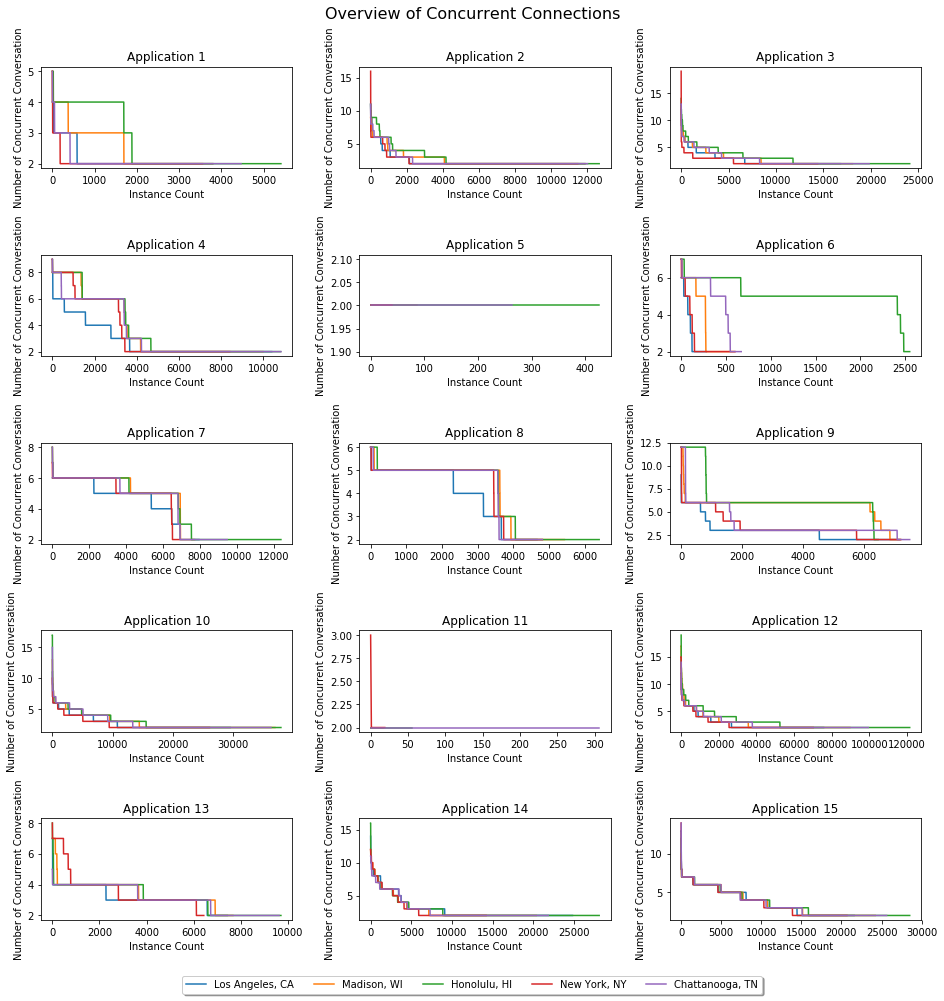

In [106]:
from matplotlib.ticker import MaxNLocator

fig = plt.figure(figsize=(13,13), constrained_layout=True)
axes = fig.subplots(5,3)
for i in concConvs:
    coord = int(translate[i])-1
    x = int(coord/3)
    y = int(coord%3)
    ax = axes[x][y]
    
    for site in concConvs[i]:
        plot_x=[]
        plot_y=[]
        for conv in concConvs[i][site]:
            if conv[1]== 1:
                continue
            plot_x.append(conv[0])
            plot_y.append(conv[1])
        ax.plot(sorted(plot_y, reverse=True), label=site)
        
    ax.set_xlabel('Instance Count')
    ax.set_ylabel('Number of Concurrent Conversation')
    
    ax.set_title('Application %s' %(translate[i]))

handles, labels = ax.get_legend_handles_labels()

site_lookup = {
  'pc3.instageni.utc.edu':'Chattanooga, TN',
  'pc5.instageni.cenic.net':'Los Angeles, CA',
  'pc5.instageni.wisc.edu':'Madison, WI',
  'pc5.instageni.hawaii.edu':'Honolulu, HI',
  'pc5.genirack.nyu.edu':'New York, NY'
  }
    
labels = [site_lookup[c] for c in labels]

fig.legend(handles, labels, loc='lower center', bbox_to_anchor = (0,-0.04,1,1),
            bbox_transform = plt.gcf().transFigure, fancybox=True, shadow=True, ncol=5)
fig.suptitle('Overview of Concurrent Connections',size=16, y=1.02)
#plt.subplots_adjust(bottom=-0.2, top=0.9)
#plt.tight_layout()
fig.savefig('/home/ldane/Desktop/concconv-plot.png', bbox_inches="tight")

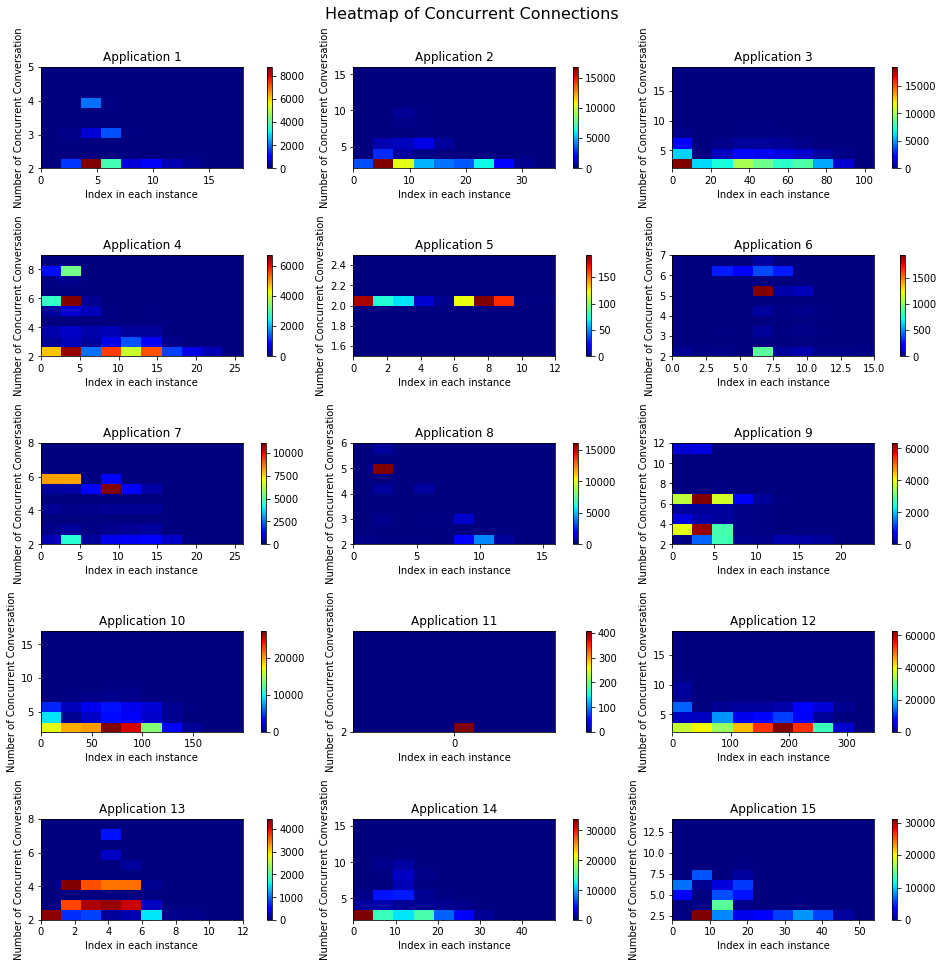

In [107]:
from matplotlib.ticker import MaxNLocator

site_lookup = {
  'pc3.instageni.utc.edu':0,
  'pc5.instageni.cenic.net':1,
  'pc5.instageni.wisc.edu':2,
  'pc5.instageni.hawaii.edu':3,
  'pc5.genirack.nyu.edu':4
  }

fig = plt.figure(figsize=(13,13), constrained_layout=True)
axes = fig.subplots(5,3)
for i in concConvs:
    coord = int(translate[i])-1
    x = int(coord/3)
    y = int(coord%3)
    ax = axes[x][y]
    
    plot_x = []
    plot_y = []
    for site in concConvs[i]:
        for conv in concConvs[i][site]:
            if conv[1] == 1:
                continue
            plot_x.append(conv[0])
            plot_y.append(conv[1])
    
    h = ax.hist2d(plot_x, plot_y, cmap=plt.cm.jet)
        
    ax.set_xlabel('Index in each instance')
    ax.set_ylabel('Number of Concurrent Conversation')
    if i == '9':
        #ax.set_xlim(0, 0.5)
        ax.set_xticks([0])
        #ax.set_ylim(1, 2)
        ax.set_yticks([2])
    
    ax.set_title('Application %s' %(translate[i]))
    fig.colorbar(h[3], ax=ax)
    

fig.suptitle('Heatmap of Concurrent Connections',size=16, y=1.02)
#plt.subplots_adjust(bottom=-0.2, top=0.9)
#plt.tight_layout()
fig.savefig('/home/ldane/Desktop/concconv-scatter.png', bbox_inches="tight")

In [119]:
pcap_data['/home/ldane/data/pcaps/20190824/44297946-092a-4e0d-b1bd-64b7a983bb8d/client12/clientResults/capture-www.wikipedia.org.pcap']['processed']

[('198.35.26.96', 1)]

In [133]:
for i in range(15):
    data = convsLen[str(i)]
    print("Application %s  %d Max %d Min %d Avg %d" %(translate[str(i)],len(data), max(data), min(data), np.average(data)))

Application 4  8945 Max 40 Min 2 Avg 30
Application 7  8938 Max 56 Min 4 Avg 33
Application 2  8944 Max 58 Min 2 Avg 33
Application 15  8891 Max 98 Min 2 Avg 76
Application 13  8939 Max 28 Min 2 Avg 17
Application 12  8888 Max 528 Min 2 Avg 352
Application 6  8870 Max 26 Min 2 Avg 14
Application 8  8940 Max 24 Min 2 Avg 20
Application 3  8940 Max 158 Min 2 Avg 67
Application 11  8940 Max 3 Min 1 Avg 1
Application 9  8935 Max 44 Min 16 Avg 29
Application 1  8957 Max 30 Min 2 Avg 16
Application 10  8929 Max 264 Min 2 Avg 121
Application 5  8926 Max 16 Min 2 Avg 10
Application 14  8866 Max 106 Min 2 Avg 47
